<a href="https://colab.research.google.com/github/Malar-cmd/Edge-Detection-/blob/main/Edge_detections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

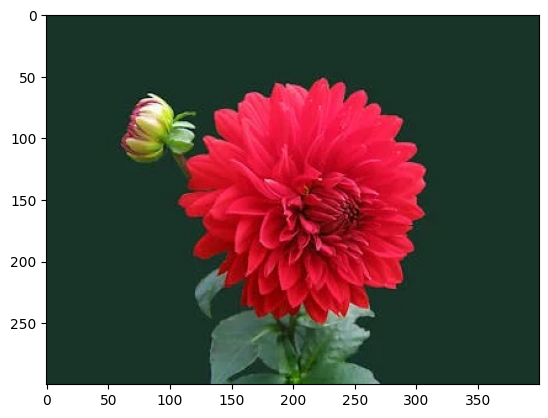

In [ ]:
image = cv2.imread('images1.jpg')


if image is None:
    print("Error: Could not read the image file.")
else:

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    og = np.copy(image)

In [ ]:
def edge0(pic):
    gray_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(pic, threshold1=50, threshold2=150)
    return edges




1.   Uses Gaussian blur to reduce noise and finds edges by detecting strong gradients.
2.   Very popular due to its accuracy and noise resistance.




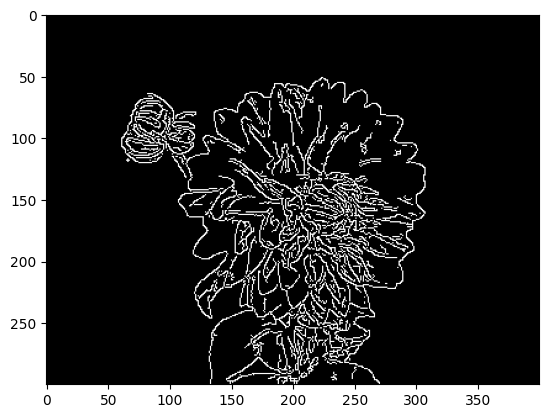

In [ ]:
#line,blur=3,3
edges=edge0(image)
plt.imshow(edges,cmap='gray')
plt.show()

In [ ]:
def edge1(pic,line,blur):
    gray_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    blur_img=cv2.medianBlur(gray_img,blur)
    edges=cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line,blur)
    return edges


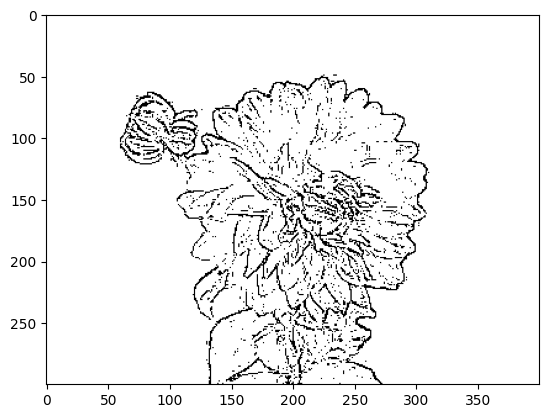

In [ ]:
line,blur=3,3
edges=edge1(image,line,blur)
plt.imshow(edges,cmap='gray')
plt.show()

In [ ]:
def edges3(pic):
  sobelx = cv2.Sobel(pic, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
  sobely = cv2.Sobel(pic, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
  edges = cv2.magnitude(sobelx, sobely)
  # Convert the edges to a suitable data type for imshow
  edges = edges.astype(np.uint8) # or edges = edges.astype(float)
  return edges



1. Detects edges by calculating gradients in horizontal and vertical directions.

2. Suitable for detecting edges in specific directions.



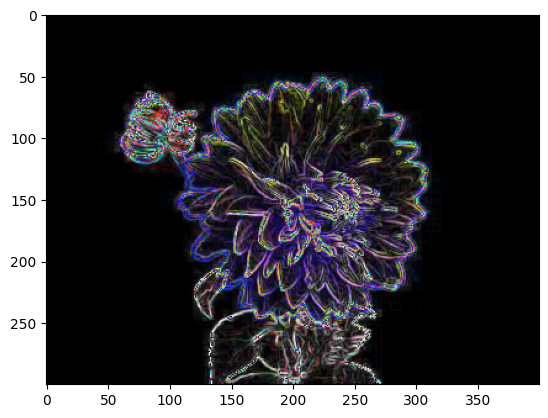

In [ ]:
edges=edges3(image)
plt.imshow(edges)
plt.show()

In [ ]:
def edges4(pic):
  scharrx = cv2.Scharr(pic, cv2.CV_64F, 1, 0)  # Horizontal edges
  scharry = cv2.Scharr(pic, cv2.CV_64F, 0, 1)  # Vertical edges
  edges = cv2.magnitude(scharrx, scharry)
  # Convert the edges to a suitable data type for imshow
  edges = edges.astype(np.uint8) # or edges = edges.astype(float)
  return edges



1.   A variation of Sobel but more accurate for small kernel sizes.



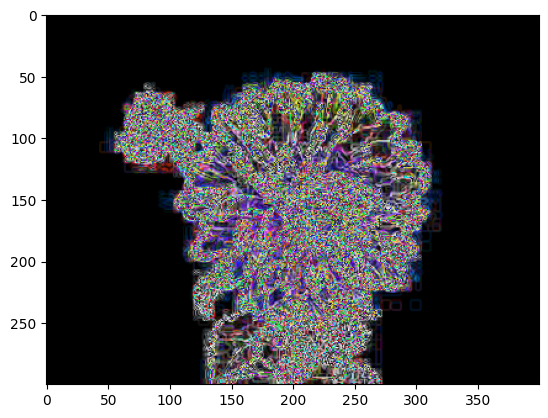

In [ ]:
edges=edges4(image)
plt.imshow(edges)
plt.show()

In [ ]:
def edges5(pic):
  kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
  kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
  prewittx = cv2.filter2D(pic, -1, kernelx)
  prewitty = cv2.filter2D(pic, -1, kernely)
  edges = prewittx + prewitty
  return edges



1.   A simpler gradient-based method, using fixed convolution kernels.


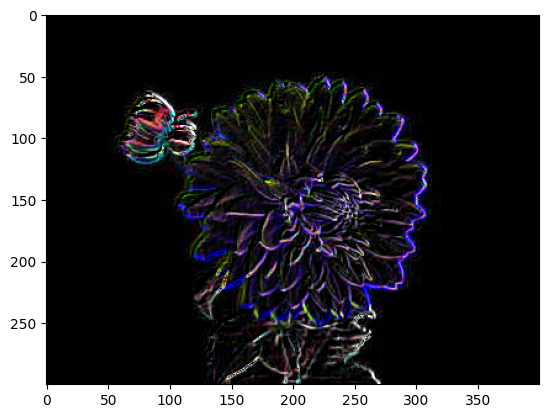

In [ ]:
edges=edges5(image)
plt.imshow(edges)
plt.show()

In [ ]:
def edges6(pic):
  gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)
  laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
  laplacian = cv2.convertScaleAbs(laplacian)
  return laplacian



1.   Applies a Gaussian filter for noise reduction, then uses the Laplacian operator for edge detection.



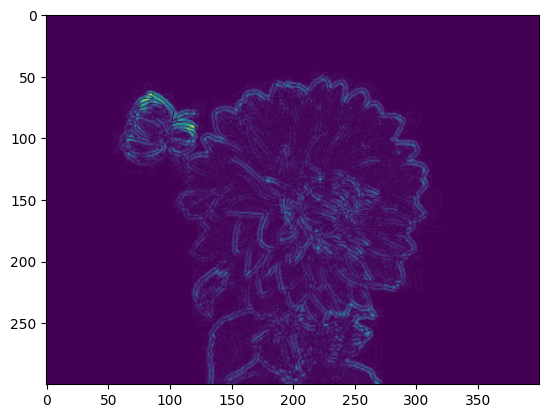

In [ ]:
edges=edges6(image)
plt.imshow(edges)
plt.show()

In [ ]:
def edges7(pic):
  blur1 = cv2.GaussianBlur(pic, (5, 5), 1)
  blur2 = cv2.GaussianBlur(pic, (5, 5), 2)
  edges = blur1 - blur2
  return edges

Subtracts two Gaussian blurred versions of the image to enhance edges.

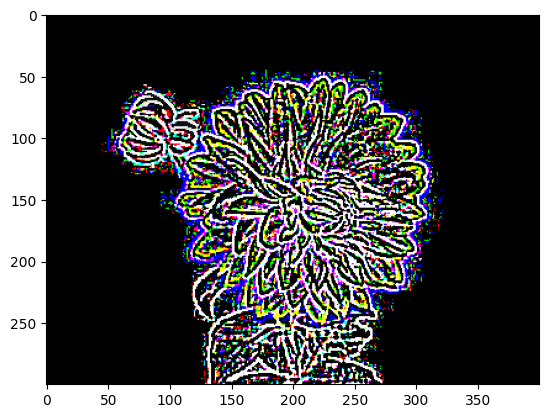

In [ ]:
edges=edges7(image)
plt.imshow(edges)
plt.show()